# Investigate Menstrual data set

### Data source: Menstrual Health & Productivity Dataset
Link: https://www.kaggle.com/datasets/puspitachowdhury2/menstrual-health-dataset/data

Import packages

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
#%matplotlib inline

Load datasets and check for cleaniness

## User dataset

### Load and investigate data

In [25]:
users_df = pd.read_csv('User_Profile.csv')
users_df.head()

user_id          state  age   bmi diet_quality exercise_frequency  \
0  U00001   Rhode Island   34  26.0         Good      5–6 days/week   
1  U00002  New Hampshire   32  26.6         Good      5–6 days/week   
2  U00003           Iowa   18  16.0         Poor      1–2 days/week   
3  U00004          Texas   30  24.7    Excellent                NaN   
4  U00005       Delaware   32  29.2         Good      1–2 days/week   

   sleep_hours  caffeine_intake  water_intake_liters alcohol_consumption  \
0          5.4              1.5                  2.0        Occasionally   
1          5.5              2.9                  2.3              Weekly   
2          6.7              0.5                  2.1               Never   
3          7.3              0.4                  1.8        Occasionally   
4          7.1              2.2                  2.2        Occasionally   

  smoking_status  birth_control_use  pcos_diagnosed  stress_score_baseline  
0             No                  1               1                    4.1  
1             No                  0               0                    5.7  
2             No                  1               0                    3.1  
3             No                  1               0                    6.6  
4             No                  0               1                    3.1

In [26]:
#identify number of rows and columns in the dataset
users_df.shape

(2000, 14)

This dataset has 2000 rows and 14 columns

In [27]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2000 non-null   object 
 1   state                  2000 non-null   object 
 2   age                    2000 non-null   int64  
 3   bmi                    2000 non-null   float64
 4   diet_quality           2000 non-null   object 
 5   exercise_frequency     1615 non-null   object 
 6   sleep_hours            2000 non-null   float64
 7   caffeine_intake        2000 non-null   float64
 8   water_intake_liters    2000 non-null   float64
 9   alcohol_consumption    2000 non-null   object 
 10  smoking_status         2000 non-null   object 
 11  birth_control_use      2000 non-null   int64  
 12  pcos_diagnosed         2000 non-null   int64  
 13  stress_score_baseline  2000 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 218.9+ 

Majority of the columns have no nulls, however exercise_frequency should be reviewed
I will want to change the boolean value columns to boolean data types

In [28]:
users_df.describe()

age          bmi  sleep_hours  caffeine_intake  \
count  2000.00000  2000.000000  2000.000000      2000.000000   
mean     25.77500    22.984950     6.994200         1.816100   
std       4.90259     4.229878     1.180696         1.062377   
min      16.00000    16.000000     4.500000         0.000000   
25%      22.00000    19.800000     6.200000         1.000000   
50%      26.00000    22.800000     7.000000         1.800000   
75%      29.00000    26.000000     7.800000         2.500000   
max      43.00000    41.200000    10.000000         5.600000   

       water_intake_liters  birth_control_use  pcos_diagnosed  \
count          2000.000000         2000.00000     2000.000000   
mean              2.303700            0.34550        0.082000   
std               0.689764            0.47565        0.274433   
min               0.800000            0.00000        0.000000   
25%               1.800000            0.00000        0.000000   
50%               2.300000            0.00000        0.000000   
75%               2.800000            1.00000        0.000000   
max               4.500000            1.00000        1.000000   

       stress_score_baseline  
count            2000.000000  
mean                5.588350  
std                 1.471255  
min                 1.000000  
25%                 4.600000  
50%                 5.600000  
75%                 6.700000  
max                10.000000

The columns with 0 values are boolean values, so 0 values are expected

#### Identify and remove nulls

In [29]:
#count of null values by column
users_df.isnull().sum()

user_id                    0
state                      0
age                        0
bmi                        0
diet_quality               0
exercise_frequency       385
sleep_hours                0
caffeine_intake            0
water_intake_liters        0
alcohol_consumption        0
smoking_status             0
birth_control_use          0
pcos_diagnosed             0
stress_score_baseline      0
dtype: int64

In [30]:
#drop rows that have a null value for exercise_frequency
users_df.dropna(subset=['exercise_frequency'], inplace=True)
#confirm rows with null values were dropped
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                1615 non-null   object 
 1   state                  1615 non-null   object 
 2   age                    1615 non-null   int64  
 3   bmi                    1615 non-null   float64
 4   diet_quality           1615 non-null   object 
 5   exercise_frequency     1615 non-null   object 
 6   sleep_hours            1615 non-null   float64
 7   caffeine_intake        1615 non-null   float64
 8   water_intake_liters    1615 non-null   float64
 9   alcohol_consumption    1615 non-null   object 
 10  smoking_status         1615 non-null   object 
 11  birth_control_use      1615 non-null   int64  
 12  pcos_diagnosed         1615 non-null   int64  
 13  stress_score_baseline  1615 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 189.3+ KB


### Review, update or drop categorical columns

#### Diet quality

In [31]:
#identify values in column
diet_quality = users_df[['diet_quality']].copy()
group_diet_quality = diet_quality.groupby('diet_quality').size()
group_diet_quality.head()

diet_quality
Average      565
Excellent    152
Good         745
Poor         153
dtype: int64

In [32]:
#ordinal data
#create order for values
diet_quality_order = {'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3}
#map to identified order
users_df['diet_quality_encoded'] = users_df['diet_quality'].map(diet_quality_order)
users_df.head()

user_id          state  age   bmi diet_quality exercise_frequency  \
0  U00001   Rhode Island   34  26.0         Good      5–6 days/week   
1  U00002  New Hampshire   32  26.6         Good      5–6 days/week   
2  U00003           Iowa   18  16.0         Poor      1–2 days/week   
4  U00005       Delaware   32  29.2         Good      1–2 days/week   
5  U00006  Massachusetts   28  21.4      Average      3–4 days/week   

   sleep_hours  caffeine_intake  water_intake_liters alcohol_consumption  \
0          5.4              1.5                  2.0        Occasionally   
1          5.5              2.9                  2.3              Weekly   
2          6.7              0.5                  2.1               Never   
4          7.1              2.2                  2.2        Occasionally   
5          7.6              1.5                  1.9        Occasionally   

  smoking_status  birth_control_use  pcos_diagnosed  stress_score_baseline  \
0             No                  1               1                    4.1   
1             No                  0               0                    5.7   
2             No                  1               0                    3.1   
4             No                  0               1                    3.1   
5             No                  1               0                    4.8   

   diet_quality_encoded  
0                     2  
1                     2  
2                     0  
4                     2  
5                     1

#### Exercise frequency

In [33]:
#identify values in column
exercise_frequency = users_df[['exercise_frequency']].copy()
group_exercise_frequency = exercise_frequency.groupby('exercise_frequency').size()
group_exercise_frequency.head()

exercise_frequency
1–2 days/week    605
3–4 days/week    734
5–6 days/week    276
dtype: int64

In [34]:
#ordinal data
#create order for values
exercise_frequency_order = {'1–2 days/week': 0, '3–4 days/week': 1, '5–6 days/week': 2}
#map to identified order
users_df['exercise_frequency_encoded'] = users_df['exercise_frequency'].map(exercise_frequency_order)
users_df.head()

user_id          state  age   bmi diet_quality exercise_frequency  \
0  U00001   Rhode Island   34  26.0         Good      5–6 days/week   
1  U00002  New Hampshire   32  26.6         Good      5–6 days/week   
2  U00003           Iowa   18  16.0         Poor      1–2 days/week   
4  U00005       Delaware   32  29.2         Good      1–2 days/week   
5  U00006  Massachusetts   28  21.4      Average      3–4 days/week   

   sleep_hours  caffeine_intake  water_intake_liters alcohol_consumption  \
0          5.4              1.5                  2.0        Occasionally   
1          5.5              2.9                  2.3              Weekly   
2          6.7              0.5                  2.1               Never   
4          7.1              2.2                  2.2        Occasionally   
5          7.6              1.5                  1.9        Occasionally   

  smoking_status  birth_control_use  pcos_diagnosed  stress_score_baseline  \
0             No                  1               1                    4.1   
1             No                  0               0                    5.7   
2             No                  1               0                    3.1   
4             No                  0               1                    3.1   
5             No                  1               0                    4.8   

   diet_quality_encoded  exercise_frequency_encoded  
0                     2                           2  
1                     2                           2  
2                     0                           0  
4                     2                           0  
5                     1                           1

#### Alcohol consumption

In [35]:
#identify values in column
alcohol_consumption = users_df[['alcohol_consumption']].copy()
group_alcohol_consumption = alcohol_consumption.groupby('alcohol_consumption').size()
group_alcohol_consumption.head()

alcohol_consumption
Never           752
Occasionally    696
Weekly          167
dtype: int64

In [36]:
#ordinal data
#create order for values
alcohol_consumption_order = {'Never': 0, 'Occasionally': 1, 'Weekly': 2}
#map to identified order
users_df['alcohol_consumption_endcoded'] = users_df['alcohol_consumption'].map(alcohol_consumption_order)
users_df.head()

user_id          state  age   bmi diet_quality exercise_frequency  \
0  U00001   Rhode Island   34  26.0         Good      5–6 days/week   
1  U00002  New Hampshire   32  26.6         Good      5–6 days/week   
2  U00003           Iowa   18  16.0         Poor      1–2 days/week   
4  U00005       Delaware   32  29.2         Good      1–2 days/week   
5  U00006  Massachusetts   28  21.4      Average      3–4 days/week   

   sleep_hours  caffeine_intake  water_intake_liters alcohol_consumption  \
0          5.4              1.5                  2.0        Occasionally   
1          5.5              2.9                  2.3              Weekly   
2          6.7              0.5                  2.1               Never   
4          7.1              2.2                  2.2        Occasionally   
5          7.6              1.5                  1.9        Occasionally   

  smoking_status  birth_control_use  pcos_diagnosed  stress_score_baseline  \
0             No                  1               1                    4.1   
1             No                  0               0                    5.7   
2             No                  1               0                    3.1   
4             No                  0               1                    3.1   
5             No                  1               0                    4.8   

   diet_quality_encoded  exercise_frequency_encoded  \
0                     2                           2   
1                     2                           2   
2                     0                           0   
4                     2                           0   
5                     1                           1   

   alcohol_consumption_endcoded  
0                             1  
1                             2  
2                             0  
4                             1  
5                             1

#### Smoking status

In [37]:
#identify values in column
smoking_status = users_df[['smoking_status']].copy()
group_smoking_status = smoking_status.groupby('smoking_status').size()
group_smoking_status.head()

smoking_status
No     1450
Yes     165
dtype: int64

In [38]:
#convert smoking_status to numerical
users_df['smoking_status'] = users_df['smoking_status'].map({'Yes': 1, 'No': 0})
users_df.head()

user_id          state  age   bmi diet_quality exercise_frequency  \
0  U00001   Rhode Island   34  26.0         Good      5–6 days/week   
1  U00002  New Hampshire   32  26.6         Good      5–6 days/week   
2  U00003           Iowa   18  16.0         Poor      1–2 days/week   
4  U00005       Delaware   32  29.2         Good      1–2 days/week   
5  U00006  Massachusetts   28  21.4      Average      3–4 days/week   

   sleep_hours  caffeine_intake  water_intake_liters alcohol_consumption  \
0          5.4              1.5                  2.0        Occasionally   
1          5.5              2.9                  2.3              Weekly   
2          6.7              0.5                  2.1               Never   
4          7.1              2.2                  2.2        Occasionally   
5          7.6              1.5                  1.9        Occasionally   

   smoking_status  birth_control_use  pcos_diagnosed  stress_score_baseline  \
0               0                  1               1                    4.1   
1               0                  0               0                    5.7   
2               0                  1               0                    3.1   
4               0                  0               1                    3.1   
5               0                  1               0                    4.8   

   diet_quality_encoded  exercise_frequency_encoded  \
0                     2                           2   
1                     2                           2   
2                     0                           0   
4                     2                           0   
5                     1                           1   

   alcohol_consumption_endcoded  
0                             1  
1                             2  
2                             0  
4                             1  
5                             1

#### Drop encoded categorical

In [39]:
#drop categorical columns
users_df = users_df.drop(['diet_quality', 'exercise_frequency', 'alcohol_consumption', 'smoking_status'], axis=1)
#validate columns are dropped
users_df.head()

user_id          state  age   bmi  sleep_hours  caffeine_intake  \
0  U00001   Rhode Island   34  26.0          5.4              1.5   
1  U00002  New Hampshire   32  26.6          5.5              2.9   
2  U00003           Iowa   18  16.0          6.7              0.5   
4  U00005       Delaware   32  29.2          7.1              2.2   
5  U00006  Massachusetts   28  21.4          7.6              1.5   

   water_intake_liters  birth_control_use  pcos_diagnosed  \
0                  2.0                  1               1   
1                  2.3                  0               0   
2                  2.1                  1               0   
4                  2.2                  0               1   
5                  1.9                  1               0   

   stress_score_baseline  diet_quality_encoded  exercise_frequency_encoded  \
0                    4.1                     2                           2   
1                    5.7                     2                           2   
2                    3.1                     0                           0   
4                    3.1                     2                           0   
5                    4.8                     1                           1   

   alcohol_consumption_endcoded  
0                             1  
1                             2  
2                             0  
4                             1  
5                             1

#### State

The last categorical value in this dataset is state, I am dropping from this analysis

In [40]:
users_df = users_df.drop('state', axis=1) 
#validate columns are dropped
users_df.head()

user_id  age   bmi  sleep_hours  caffeine_intake  water_intake_liters  \
0  U00001   34  26.0          5.4              1.5                  2.0   
1  U00002   32  26.6          5.5              2.9                  2.3   
2  U00003   18  16.0          6.7              0.5                  2.1   
4  U00005   32  29.2          7.1              2.2                  2.2   
5  U00006   28  21.4          7.6              1.5                  1.9   

   birth_control_use  pcos_diagnosed  stress_score_baseline  \
0                  1               1                    4.1   
1                  0               0                    5.7   
2                  1               0                    3.1   
4                  0               1                    3.1   
5                  1               0                    4.8   

   diet_quality_encoded  exercise_frequency_encoded  \
0                     2                           2   
1                     2                           2   
2                     0                           0   
4                     2                           0   
5                     1                           1   

   alcohol_consumption_endcoded  
0                             1  
1                             2  
2                             0  
4                             1  
5                             1

### Final

In [41]:
users_df.head()

user_id  age   bmi  sleep_hours  caffeine_intake  water_intake_liters  \
0  U00001   34  26.0          5.4              1.5                  2.0   
1  U00002   32  26.6          5.5              2.9                  2.3   
2  U00003   18  16.0          6.7              0.5                  2.1   
4  U00005   32  29.2          7.1              2.2                  2.2   
5  U00006   28  21.4          7.6              1.5                  1.9   

   birth_control_use  pcos_diagnosed  stress_score_baseline  \
0                  1               1                    4.1   
1                  0               0                    5.7   
2                  1               0                    3.1   
4                  0               1                    3.1   
5                  1               0                    4.8   

   diet_quality_encoded  exercise_frequency_encoded  \
0                     2                           2   
1                     2                           2   
2                     0                           0   
4                     2                           0   
5                     1                           1   

   alcohol_consumption_endcoded  
0                             1  
1                             2  
2                             0  
4                             1  
5                             1

In [73]:
#sns.pairplot(users_df, kind='reg')
#plt.show()

## Period Log Dataset

### Load and investigate data

In [43]:
period_log_df = pd.read_csv('Period_Log.csv')
period_log_df.head()

user_id  cycle_number  start_date  cycle_length_days  prev_cycle_length  \
0  U00001             1  2024-02-13                 33                NaN   
1  U00001             2  2024-03-17                 33               33.0   
2  U00001             3  2024-04-19                 34               33.0   
3  U00001             4  2024-05-23                 31               34.0   
4  U00001             5  2024-06-23                 31               31.0   

  cycle_phase flow_level  pain_level pms_symptoms  mood_score  ...  \
0      Luteal      Heavy           9          Yes           6  ...   
1  Follicular      Light           2           No           8  ...   
2  Follicular      Heavy           8           No           5  ...   
3      Luteal      Light           3           No           8  ...   
4      Luteal   Moderate           3           No           9  ...   

   sleep_hours_cycle  energy_level  concentration_score  work_hours_lost  \
0                5.3             6                    7              5.1   
1                4.6             7                    8              2.6   
2                5.1             5                    5              6.8   
3                6.7             8                    8              2.5   
4                5.8             9                    8              2.4   

   estrogen_pgml  progesterone_ngml  ovulation_result overall_health_score  \
0           84.7               4.14          Positive                  6.5   
1          126.1               2.79          Negative                  9.4   
2          131.1               1.70          Negative                  6.7   
3           82.0               8.50          Negative                  9.0   
4           55.5               6.30          Negative                  9.3   

   log_consistency_score  prepared_before_period  
0                  0.949                       0  
1                  0.949                       1  
2                  0.949                       1  
3                  0.949                       0  
4                  0.949                       1  

[5 rows x 21 columns]

In [44]:
period_log_df.shape

(17976, 21)

In [45]:
period_log_df.describe()

cycle_number  cycle_length_days  prev_cycle_length    pain_level  \
count  17976.000000       17976.000000       15976.000000  17976.000000   
mean       5.214842          27.816756          27.826865      4.854473   
std        2.931241           2.400329           2.399832      2.230292   
min        1.000000          22.000000          22.000000      1.000000   
25%        3.000000          26.000000          26.000000      3.000000   
50%        5.000000          28.000000          28.000000      5.000000   
75%        7.000000          29.000000          29.000000      6.000000   
max       12.000000          44.000000          44.000000     10.000000   

         mood_score  stress_score_cycle  sleep_hours_cycle  energy_level  \
count  17976.000000        17976.000000       17976.000000  17976.000000   
mean       7.084947            5.749260           6.960253      6.832165   
std        1.506431            1.771953           1.315146      1.687533   
min        1.000000            1.000000           4.500000      1.000000   
25%        6.000000            4.500000           6.000000      6.000000   
50%        7.000000            5.800000           7.000000      7.000000   
75%        8.000000            7.000000           7.900000      8.000000   
max       10.000000           10.000000          10.000000     10.000000   

       concentration_score  work_hours_lost  estrogen_pgml  progesterone_ngml  \
count         17976.000000     17976.000000   17976.000000       17976.000000   
mean              7.352025         3.394443      96.429840           5.336521   
std               1.435035         1.495181      27.928743           3.791151   
min               2.000000         0.000000      10.000000           0.100000   
25%               6.000000         2.300000      76.300000           2.230000   
50%               7.000000         3.400000      94.300000           3.830000   
75%               8.000000         4.400000     115.100000           8.370000   
max              10.000000         8.800000     206.500000          20.250000   

       overall_health_score  log_consistency_score  prepared_before_period  
count          17976.000000           17976.000000            17976.000000  
mean               8.548665               0.935288                0.567701  
std                1.106405               0.020129                0.495409  
min                4.400000               0.860000                0.000000  
25%                7.800000               0.921000                0.000000  
50%                8.600000               0.936000                1.000000  
75%                9.500000               0.950000                1.000000  
max               10.000000               0.985000                1.000000

In [46]:
period_log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 17976 non-null  object 
 1   cycle_number            17976 non-null  int64  
 2   start_date              17976 non-null  object 
 3   cycle_length_days       17976 non-null  int64  
 4   prev_cycle_length       15976 non-null  float64
 5   cycle_phase             17976 non-null  object 
 6   flow_level              17976 non-null  object 
 7   pain_level              17976 non-null  int64  
 8   pms_symptoms            17976 non-null  object 
 9   mood_score              17976 non-null  int64  
 10  stress_score_cycle      17976 non-null  float64
 11  sleep_hours_cycle       17976 non-null  float64
 12  energy_level            17976 non-null  int64  
 13  concentration_score     17976 non-null  int64  
 14  work_hours_lost         17976 non-null

In [47]:
#convert start date column to date
period_log_df['start_date'] = pd.to_datetime(period_log_df['start_date'])
#confirm conversion
period_log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 17976 non-null  object        
 1   cycle_number            17976 non-null  int64         
 2   start_date              17976 non-null  datetime64[ns]
 3   cycle_length_days       17976 non-null  int64         
 4   prev_cycle_length       15976 non-null  float64       
 5   cycle_phase             17976 non-null  object        
 6   flow_level              17976 non-null  object        
 7   pain_level              17976 non-null  int64         
 8   pms_symptoms            17976 non-null  object        
 9   mood_score              17976 non-null  int64         
 10  stress_score_cycle      17976 non-null  float64       
 11  sleep_hours_cycle       17976 non-null  float64       
 12  energy_level            17976 non-null  int64 

In [48]:
#count of null values by column
period_log_df.isnull().sum()

user_id                      0
cycle_number                 0
start_date                   0
cycle_length_days            0
prev_cycle_length         2000
cycle_phase                  0
flow_level                   0
pain_level                   0
pms_symptoms                 0
mood_score                   0
stress_score_cycle           0
sleep_hours_cycle            0
energy_level                 0
concentration_score          0
work_hours_lost              0
estrogen_pgml                0
progesterone_ngml            0
ovulation_result             0
overall_health_score         0
log_consistency_score        0
prepared_before_period       0
dtype: int64

In [49]:
filtered_period_log_df = period_log_df[period_log_df['prev_cycle_length'].isnull()]
filtered_period_log_df.head()

user_id  cycle_number start_date  cycle_length_days  prev_cycle_length  \
0   U00001             1 2024-02-13                 33                NaN   
11  U00002             1 2024-03-13                 25                NaN   
23  U00003             1 2024-03-15                 26                NaN   
34  U00004             1 2024-02-01                 28                NaN   
45  U00005             1 2024-03-23                 36                NaN   

   cycle_phase flow_level  pain_level pms_symptoms  mood_score  ...  \
0       Luteal      Heavy           9          Yes           6  ...   
11  Follicular      Light           2           No           9  ...   
23   Menstrual   Moderate           4           No           8  ...   
34  Follicular      Light           3           No           9  ...   
45  Follicular   Moderate           5           No           6  ...   

    sleep_hours_cycle  energy_level  concentration_score  work_hours_lost  \
0                 5.3             6                    7              5.1   
11                5.6             8                    9              2.6   
23                7.3             7                    9              2.5   
34                7.1             6                    8              2.7   
45                7.6            10                    7              2.0   

    estrogen_pgml  progesterone_ngml  ovulation_result overall_health_score  \
0            84.7               4.14          Positive                  6.5   
11           63.9               3.44          Positive                  9.6   
23           27.4               1.47          Negative                  8.9   
34          107.6               1.20          Negative                  9.5   
45          104.7               2.58          Negative                  8.9   

    log_consistency_score  prepared_before_period  
0                   0.949                       0  
11                  0.923                       0  
23                  0.953                       0  
34                  0.946                       0  
45                  0.929                       0  

[5 rows x 21 columns]

In [50]:
#check if any of that the rows with na prev cycle length has the cycle number of 1
filtered_period_log_df = filtered_period_log_df[filtered_period_log_df['cycle_number'] != 1]
filtered_period_log_df.head()

Empty DataFrame
Columns: [user_id, cycle_number, start_date, cycle_length_days, prev_cycle_length, cycle_phase, flow_level, pain_level, pms_symptoms, mood_score, stress_score_cycle, sleep_hours_cycle, energy_level, concentration_score, work_hours_lost, estrogen_pgml, progesterone_ngml, ovulation_result, overall_health_score, log_consistency_score, prepared_before_period]
Index: []

[0 rows x 21 columns]

In [51]:
filtered_period_log_df.describe()

cycle_number start_date  cycle_length_days  prev_cycle_length  \
count           0.0          0                0.0                0.0   
mean            NaN        NaT                NaN                NaN   
min             NaN        NaT                NaN                NaN   
25%             NaN        NaT                NaN                NaN   
50%             NaN        NaT                NaN                NaN   
75%             NaN        NaT                NaN                NaN   
max             NaN        NaT                NaN                NaN   
std             NaN        NaN                NaN                NaN   

       pain_level  mood_score  stress_score_cycle  sleep_hours_cycle  \
count         0.0         0.0                 0.0                0.0   
mean          NaN         NaN                 NaN                NaN   
min           NaN         NaN                 NaN                NaN   
25%           NaN         NaN                 NaN                NaN   
50%           NaN         NaN                 NaN                NaN   
75%           NaN         NaN                 NaN                NaN   
max           NaN         NaN                 NaN                NaN   
std           NaN         NaN                 NaN                NaN   

       energy_level  concentration_score  work_hours_lost  estrogen_pgml  \
count           0.0                  0.0              0.0            0.0   
mean            NaN                  NaN              NaN            NaN   
min             NaN                  NaN              NaN            NaN   
25%             NaN                  NaN              NaN            NaN   
50%             NaN                  NaN              NaN            NaN   
75%             NaN                  NaN              NaN            NaN   
max             NaN                  NaN              NaN            NaN   
std             NaN                  NaN              NaN            NaN   

       progesterone_ngml  overall_health_score  log_consistency_score  \
count                0.0                   0.0                    0.0   
mean                 NaN                   NaN                    NaN   
min                  NaN                   NaN                    NaN   
25%                  NaN                   NaN                    NaN   
50%                  NaN                   NaN                    NaN   
75%                  NaN                   NaN                    NaN   
max                  NaN                   NaN                    NaN   
std                  NaN                   NaN                    NaN   

       prepared_before_period  
count                     0.0  
mean                      NaN  
min                       NaN  
25%                       NaN  
50%                       NaN  
75%                       NaN  
max                       NaN  
std                       NaN

### Review categorical columns

In [52]:
period_log_df.head()

user_id  cycle_number start_date  cycle_length_days  prev_cycle_length  \
0  U00001             1 2024-02-13                 33                NaN   
1  U00001             2 2024-03-17                 33               33.0   
2  U00001             3 2024-04-19                 34               33.0   
3  U00001             4 2024-05-23                 31               34.0   
4  U00001             5 2024-06-23                 31               31.0   

  cycle_phase flow_level  pain_level pms_symptoms  mood_score  ...  \
0      Luteal      Heavy           9          Yes           6  ...   
1  Follicular      Light           2           No           8  ...   
2  Follicular      Heavy           8           No           5  ...   
3      Luteal      Light           3           No           8  ...   
4      Luteal   Moderate           3           No           9  ...   

   sleep_hours_cycle  energy_level  concentration_score  work_hours_lost  \
0                5.3             6                    7              5.1   
1                4.6             7                    8              2.6   
2                5.1             5                    5              6.8   
3                6.7             8                    8              2.5   
4                5.8             9                    8              2.4   

   estrogen_pgml  progesterone_ngml  ovulation_result overall_health_score  \
0           84.7               4.14          Positive                  6.5   
1          126.1               2.79          Negative                  9.4   
2          131.1               1.70          Negative                  6.7   
3           82.0               8.50          Negative                  9.0   
4           55.5               6.30          Negative                  9.3   

   log_consistency_score  prepared_before_period  
0                  0.949                       0  
1                  0.949                       1  
2                  0.949                       1  
3                  0.949                       0  
4                  0.949                       1  

[5 rows x 21 columns]

#### Cycle Phase

In [53]:
#identify values in column
cycle_phase = period_log_df[['cycle_phase']].copy()
group_cycle_phase = cycle_phase.groupby('cycle_phase').size()
group_cycle_phase.head()

cycle_phase
Follicular    8092
Luteal        8068
Menstrual     1816
dtype: int64

In [54]:
#no ordinal data
#one hot encode
period_log_encoded = pd.get_dummies(period_log_df, columns=['cycle_phase'], dtype=int)
period_log_encoded.head()

user_id  cycle_number start_date  cycle_length_days  prev_cycle_length  \
0  U00001             1 2024-02-13                 33                NaN   
1  U00001             2 2024-03-17                 33               33.0   
2  U00001             3 2024-04-19                 34               33.0   
3  U00001             4 2024-05-23                 31               34.0   
4  U00001             5 2024-06-23                 31               31.0   

  flow_level  pain_level pms_symptoms  mood_score  stress_score_cycle  ...  \
0      Heavy           9          Yes           6                 5.4  ...   
1      Light           2           No           8                 3.7  ...   
2      Heavy           8           No           5                 5.7  ...   
3      Light           3           No           8                 5.2  ...   
4   Moderate           3           No           9                 3.7  ...   

   work_hours_lost  estrogen_pgml  progesterone_ngml  ovulation_result  \
0              5.1           84.7               4.14          Positive   
1              2.6          126.1               2.79          Negative   
2              6.8          131.1               1.70          Negative   
3              2.5           82.0               8.50          Negative   
4              2.4           55.5               6.30          Negative   

   overall_health_score  log_consistency_score prepared_before_period  \
0                   6.5                  0.949                      0   
1                   9.4                  0.949                      1   
2                   6.7                  0.949                      1   
3                   9.0                  0.949                      0   
4                   9.3                  0.949                      1   

   cycle_phase_Follicular  cycle_phase_Luteal  cycle_phase_Menstrual  
0                       0                   1                      0  
1                       1                   0                      0  
2                       1                   0                      0  
3                       0                   1                      0  
4                       0                   1                      0  

[5 rows x 23 columns]

#### Flow level

In [55]:
#identify values in column
flow_level = period_log_df[['flow_level']].copy()
group_flow_level = flow_level.groupby('flow_level').size()
group_flow_level.head()

flow_level
Heavy       2454
Light       6665
Moderate    8857
dtype: int64

In [56]:
#ordinal data
#create order for values
flow_level_order = {'Light': 0, 'Moderate': 1, 'Heavy': 2}
#map to identified order
period_log_encoded['flow_level'] = period_log_encoded['flow_level'].map(flow_level_order)
period_log_encoded.head()

user_id  cycle_number start_date  cycle_length_days  prev_cycle_length  \
0  U00001             1 2024-02-13                 33                NaN   
1  U00001             2 2024-03-17                 33               33.0   
2  U00001             3 2024-04-19                 34               33.0   
3  U00001             4 2024-05-23                 31               34.0   
4  U00001             5 2024-06-23                 31               31.0   

   flow_level  pain_level pms_symptoms  mood_score  stress_score_cycle  ...  \
0           2           9          Yes           6                 5.4  ...   
1           0           2           No           8                 3.7  ...   
2           2           8           No           5                 5.7  ...   
3           0           3           No           8                 5.2  ...   
4           1           3           No           9                 3.7  ...   

   work_hours_lost  estrogen_pgml  progesterone_ngml  ovulation_result  \
0              5.1           84.7               4.14          Positive   
1              2.6          126.1               2.79          Negative   
2              6.8          131.1               1.70          Negative   
3              2.5           82.0               8.50          Negative   
4              2.4           55.5               6.30          Negative   

   overall_health_score  log_consistency_score prepared_before_period  \
0                   6.5                  0.949                      0   
1                   9.4                  0.949                      1   
2                   6.7                  0.949                      1   
3                   9.0                  0.949                      0   
4                   9.3                  0.949                      1   

   cycle_phase_Follicular  cycle_phase_Luteal  cycle_phase_Menstrual  
0                       0                   1                      0  
1                       1                   0                      0  
2                       1                   0                      0  
3                       0                   1                      0  
4                       0                   1                      0  

[5 rows x 23 columns]

#### PMS Symptoms

In [57]:
#identify values in column
pms_symptoms = period_log_df[['pms_symptoms']].copy()
group_pms_symptoms = pms_symptoms.groupby('pms_symptoms').size()
group_pms_symptoms.head()

pms_symptoms
No     12675
Yes     5301
dtype: int64

In [58]:
#convert PMS symptoms to numerical
period_log_encoded['pms_symptoms'] = period_log_encoded['pms_symptoms'].map({'Yes': 1, 'No': 0})
period_log_encoded.head()

user_id  cycle_number start_date  cycle_length_days  prev_cycle_length  \
0  U00001             1 2024-02-13                 33                NaN   
1  U00001             2 2024-03-17                 33               33.0   
2  U00001             3 2024-04-19                 34               33.0   
3  U00001             4 2024-05-23                 31               34.0   
4  U00001             5 2024-06-23                 31               31.0   

   flow_level  pain_level  pms_symptoms  mood_score  stress_score_cycle  ...  \
0           2           9             1           6                 5.4  ...   
1           0           2             0           8                 3.7  ...   
2           2           8             0           5                 5.7  ...   
3           0           3             0           8                 5.2  ...   
4           1           3             0           9                 3.7  ...   

   work_hours_lost  estrogen_pgml  progesterone_ngml  ovulation_result  \
0              5.1           84.7               4.14          Positive   
1              2.6          126.1               2.79          Negative   
2              6.8          131.1               1.70          Negative   
3              2.5           82.0               8.50          Negative   
4              2.4           55.5               6.30          Negative   

   overall_health_score  log_consistency_score prepared_before_period  \
0                   6.5                  0.949                      0   
1                   9.4                  0.949                      1   
2                   6.7                  0.949                      1   
3                   9.0                  0.949                      0   
4                   9.3                  0.949                      1   

   cycle_phase_Follicular  cycle_phase_Luteal  cycle_phase_Menstrual  
0                       0                   1                      0  
1                       1                   0                      0  
2                       1                   0                      0  
3                       0                   1                      0  
4                       0                   1                      0  

[5 rows x 23 columns]

#### Ovulation Result

In [59]:
#identify values in column
ovulation_result = period_log_df[['ovulation_result']].copy()
group_ovulation_result = ovulation_result.groupby('ovulation_result').size()
group_ovulation_result.head()

ovulation_result
Negative    8246
Positive    9730
dtype: int64

In [60]:
#convert ovulation result to numerical
period_log_encoded['ovulation_result'] = period_log_encoded['ovulation_result'].map({'Positive': 1, 'Negative': 0})
period_log_encoded.head()

user_id  cycle_number start_date  cycle_length_days  prev_cycle_length  \
0  U00001             1 2024-02-13                 33                NaN   
1  U00001             2 2024-03-17                 33               33.0   
2  U00001             3 2024-04-19                 34               33.0   
3  U00001             4 2024-05-23                 31               34.0   
4  U00001             5 2024-06-23                 31               31.0   

   flow_level  pain_level  pms_symptoms  mood_score  stress_score_cycle  ...  \
0           2           9             1           6                 5.4  ...   
1           0           2             0           8                 3.7  ...   
2           2           8             0           5                 5.7  ...   
3           0           3             0           8                 5.2  ...   
4           1           3             0           9                 3.7  ...   

   work_hours_lost  estrogen_pgml  progesterone_ngml  ovulation_result  \
0              5.1           84.7               4.14                 1   
1              2.6          126.1               2.79                 0   
2              6.8          131.1               1.70                 0   
3              2.5           82.0               8.50                 0   
4              2.4           55.5               6.30                 0   

   overall_health_score  log_consistency_score  prepared_before_period  \
0                   6.5                  0.949                       0   
1                   9.4                  0.949                       1   
2                   6.7                  0.949                       1   
3                   9.0                  0.949                       0   
4                   9.3                  0.949                       1   

   cycle_phase_Follicular  cycle_phase_Luteal  cycle_phase_Menstrual  
0                       0                   1                      0  
1                       1                   0                      0  
2                       1                   0                      0  
3                       0                   1                      0  
4                       0                   1                      0  

[5 rows x 23 columns]

#### Summary

In [61]:
period_log_encoded.describe()

cycle_number                     start_date  cycle_length_days  \
count  17976.000000                          17976       17976.000000   
mean       5.214842  2024-06-08 23:23:33.084112128          27.816756   
min        1.000000            2024-01-01 00:00:00          22.000000   
25%        3.000000            2024-04-02 00:00:00          26.000000   
50%        5.000000            2024-06-03 00:00:00          28.000000   
75%        7.000000            2024-08-09 00:00:00          29.000000   
max       12.000000            2025-04-05 00:00:00          44.000000   
std        2.931241                            NaN           2.400329   

       prev_cycle_length    flow_level    pain_level  pms_symptoms  \
count       15976.000000  17976.000000  17976.000000  17976.000000   
mean           27.826865      0.765743      4.854473      0.294893   
min            22.000000      0.000000      1.000000      0.000000   
25%            26.000000      0.000000      3.000000      0.000000   
50%            28.000000      1.000000      5.000000      0.000000   
75%            29.000000      1.000000      6.000000      1.000000   
max            44.000000      2.000000     10.000000      1.000000   
std             2.399832      0.672634      2.230292      0.456007   

         mood_score  stress_score_cycle  sleep_hours_cycle  ...  \
count  17976.000000        17976.000000       17976.000000  ...   
mean       7.084947            5.749260           6.960253  ...   
min        1.000000            1.000000           4.500000  ...   
25%        6.000000            4.500000           6.000000  ...   
50%        7.000000            5.800000           7.000000  ...   
75%        8.000000            7.000000           7.900000  ...   
max       10.000000           10.000000          10.000000  ...   
std        1.506431            1.771953           1.315146  ...   

       work_hours_lost  estrogen_pgml  progesterone_ngml  ovulation_result  \
count     17976.000000   17976.000000       17976.000000      17976.000000   
mean          3.394443      96.429840           5.336521          0.541277   
min           0.000000      10.000000           0.100000          0.000000   
25%           2.300000      76.300000           2.230000          0.000000   
50%           3.400000      94.300000           3.830000          1.000000   
75%           4.400000     115.100000           8.370000          1.000000   
max           8.800000     206.500000          20.250000          1.000000   
std           1.495181      27.928743           3.791151          0.498307   

       overall_health_score  log_consistency_score  prepared_before_period  \
count          17976.000000           17976.000000            17976.000000   
mean               8.548665               0.935288                0.567701   
min                4.400000               0.860000                0.000000   
25%                7.800000               0.921000                0.000000   
50%                8.600000               0.936000                1.000000   
75%                9.500000               0.950000                1.000000   
max               10.000000               0.985000                1.000000   
std                1.106405               0.020129                0.495409   

       cycle_phase_Follicular  cycle_phase_Luteal  cycle_phase_Menstrual  
count            17976.000000        17976.000000           17976.000000  
mean                 0.450156            0.448821               0.101024  
min                  0.000000            0.000000               0.000000  
25%                  0.000000            0.000000               0.000000  
50%                  0.000000            0.000000               0.000000  
75%                  1.000000            1.000000               0.000000  
max                  1.000000            1.000000               1.000000  
std                  0.497523            0.497388               0.301368  

[8 rows x 22 columns]

In [62]:
period_log_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 17976 non-null  object        
 1   cycle_number            17976 non-null  int64         
 2   start_date              17976 non-null  datetime64[ns]
 3   cycle_length_days       17976 non-null  int64         
 4   prev_cycle_length       15976 non-null  float64       
 5   flow_level              17976 non-null  int64         
 6   pain_level              17976 non-null  int64         
 7   pms_symptoms            17976 non-null  int64         
 8   mood_score              17976 non-null  int64         
 9   stress_score_cycle      17976 non-null  float64       
 10  sleep_hours_cycle       17976 non-null  float64       
 11  energy_level            17976 non-null  int64         
 12  concentration_score     17976 non-null  int64 

### Final data set

In [63]:
period_log_encoded.head()

user_id  cycle_number start_date  cycle_length_days  prev_cycle_length  \
0  U00001             1 2024-02-13                 33                NaN   
1  U00001             2 2024-03-17                 33               33.0   
2  U00001             3 2024-04-19                 34               33.0   
3  U00001             4 2024-05-23                 31               34.0   
4  U00001             5 2024-06-23                 31               31.0   

   flow_level  pain_level  pms_symptoms  mood_score  stress_score_cycle  ...  \
0           2           9             1           6                 5.4  ...   
1           0           2             0           8                 3.7  ...   
2           2           8             0           5                 5.7  ...   
3           0           3             0           8                 5.2  ...   
4           1           3             0           9                 3.7  ...   

   work_hours_lost  estrogen_pgml  progesterone_ngml  ovulation_result  \
0              5.1           84.7               4.14                 1   
1              2.6          126.1               2.79                 0   
2              6.8          131.1               1.70                 0   
3              2.5           82.0               8.50                 0   
4              2.4           55.5               6.30                 0   

   overall_health_score  log_consistency_score  prepared_before_period  \
0                   6.5                  0.949                       0   
1                   9.4                  0.949                       1   
2                   6.7                  0.949                       1   
3                   9.0                  0.949                       0   
4                   9.3                  0.949                       1   

   cycle_phase_Follicular  cycle_phase_Luteal  cycle_phase_Menstrual  
0                       0                   1                      0  
1                       1                   0                      0  
2                       1                   0                      0  
3                       0                   1                      0  
4                       0                   1                      0  

[5 rows x 23 columns]

In [ ]:
stress_score_cycle

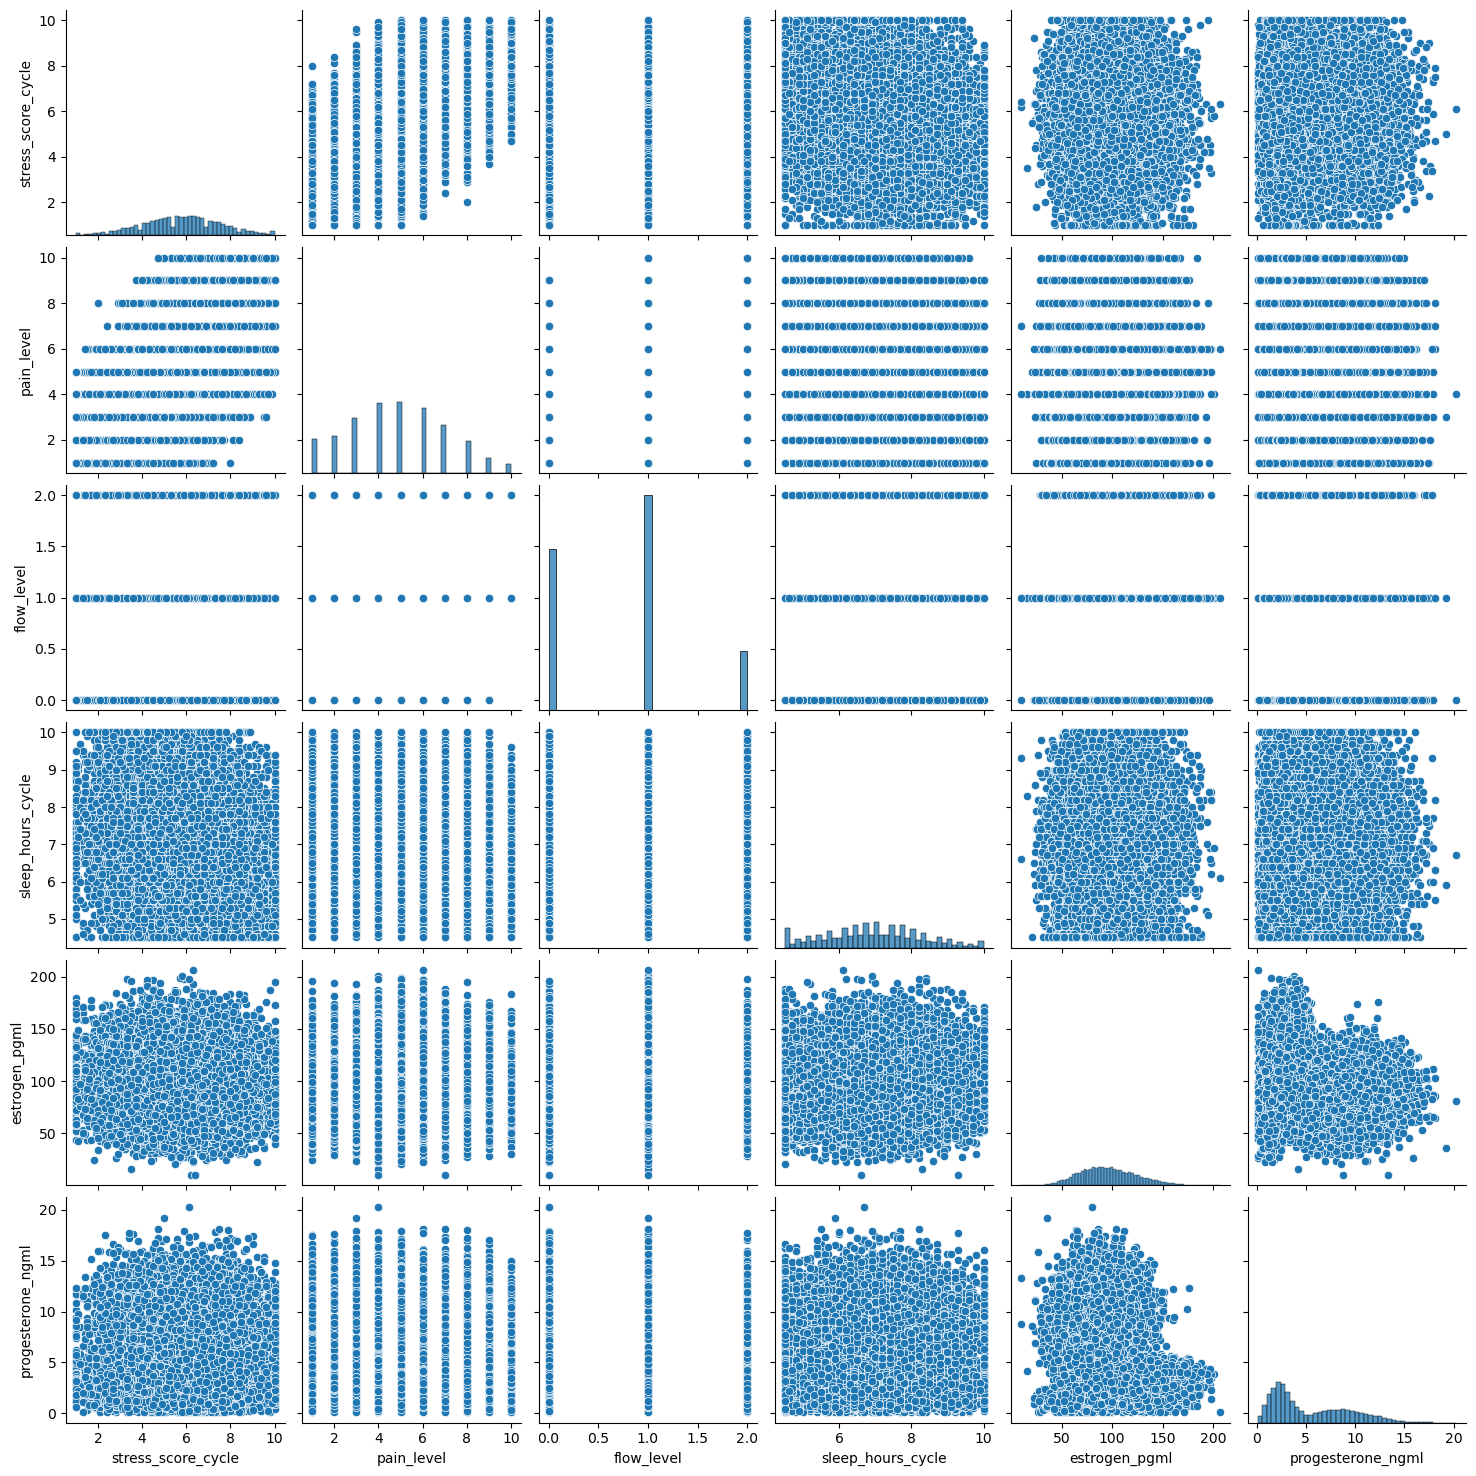

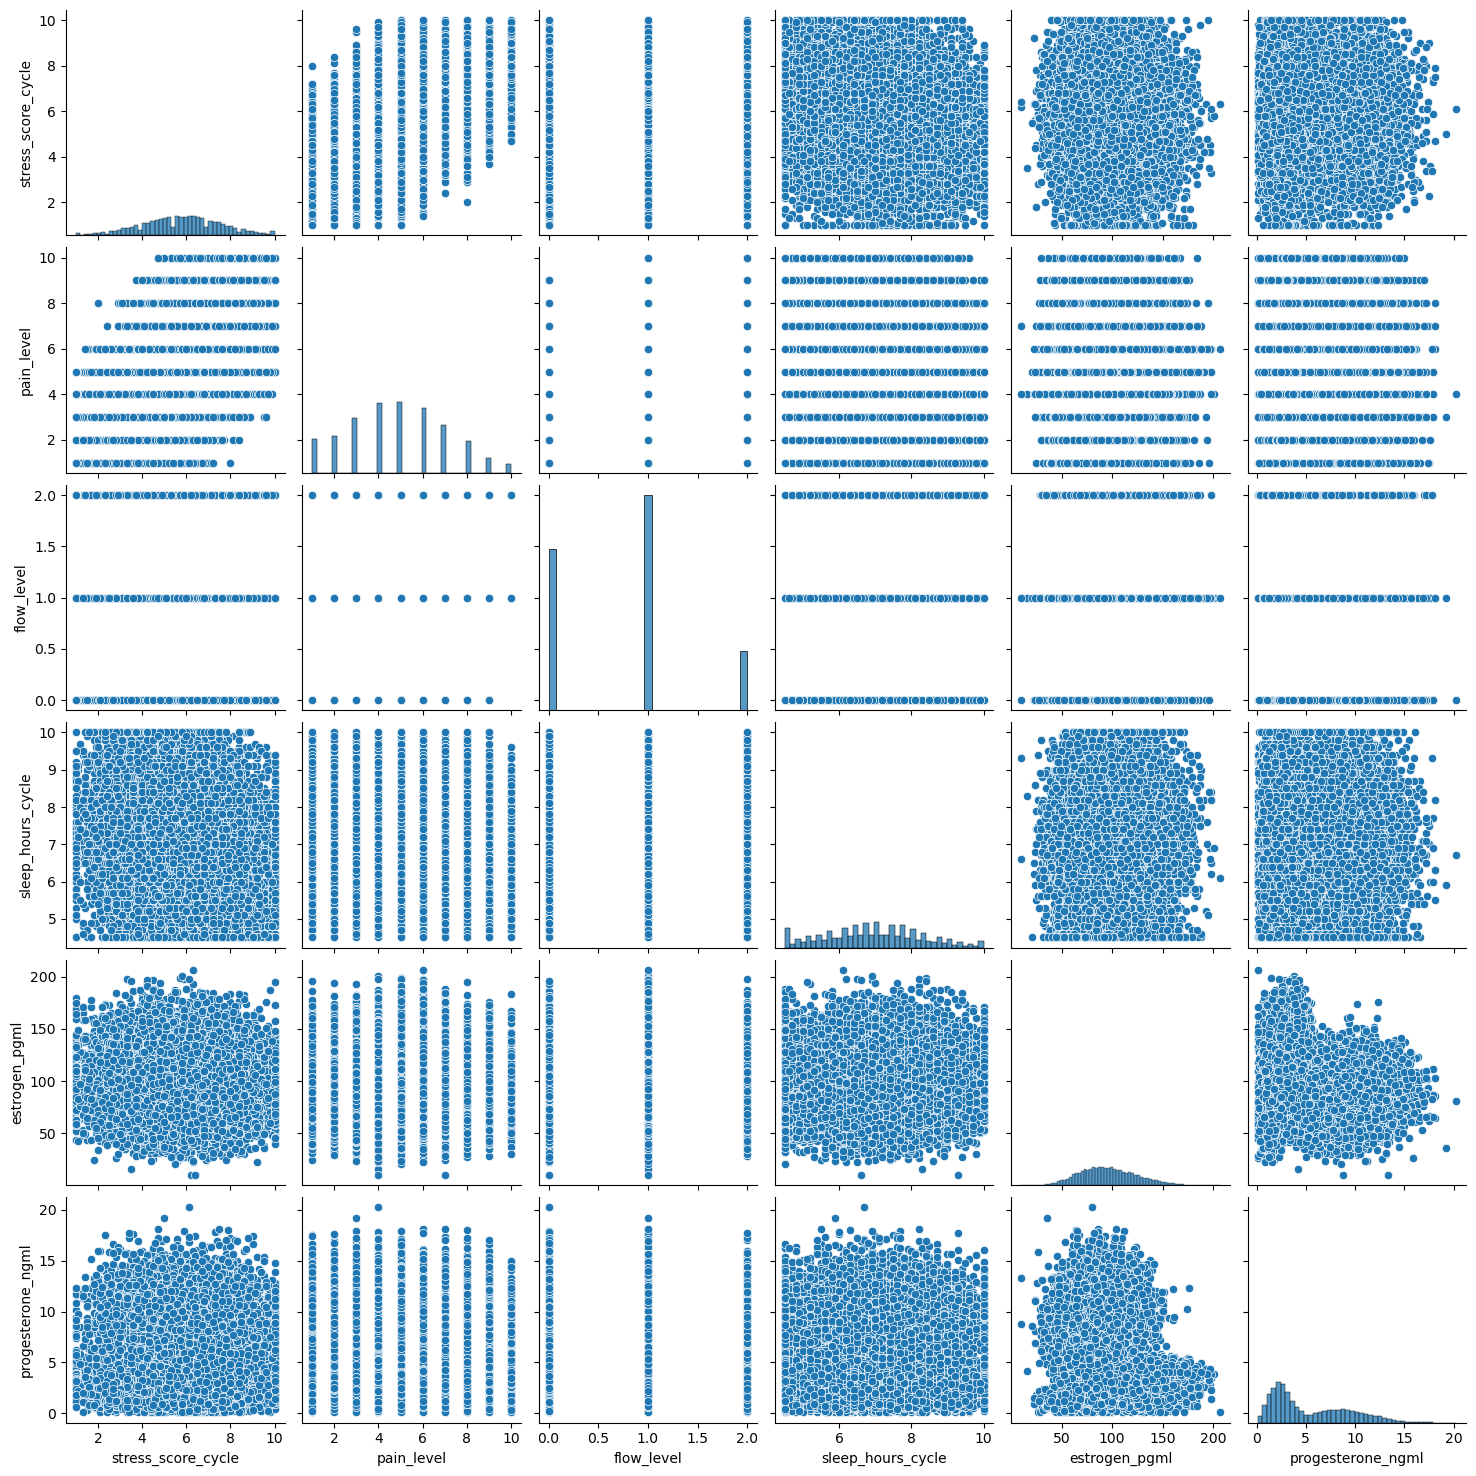

In [78]:
sns.pairplot(period_log_encoded[['stress_score_cycle', 'pain_level', 'flow_level', 'sleep_hours_cycle', 'estrogen_pgml', 'progesterone_ngml']]);
plt.show();

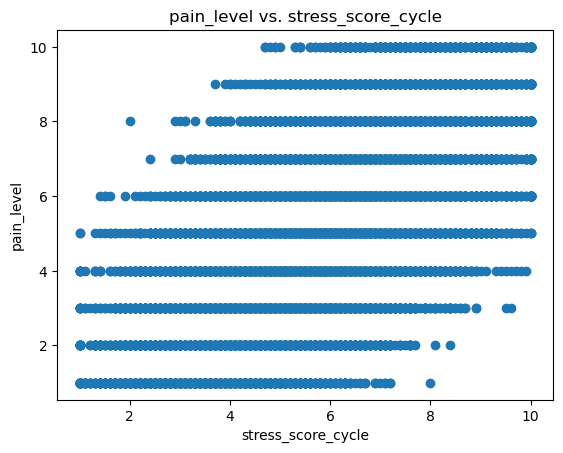

In [80]:
plt.scatter(period_log_encoded['stress_score_cycle'], period_log_encoded['pain_level']);
plt.xlabel('stress_score_cycle');
plt.ylabel('pain_level');
plt.title('pain_level vs. stress_score_cycle');
plt.show()

## Merge Datasets

In [64]:
#merge datasets
merged_df = period_log_encoded.merge(users_df, on='user_id', how='inner')
merged_df.head()

user_id  cycle_number start_date  cycle_length_days  prev_cycle_length  \
0  U00001             1 2024-02-13                 33                NaN   
1  U00001             2 2024-03-17                 33               33.0   
2  U00001             3 2024-04-19                 34               33.0   
3  U00001             4 2024-05-23                 31               34.0   
4  U00001             5 2024-06-23                 31               31.0   

   flow_level  pain_level  pms_symptoms  mood_score  stress_score_cycle  ...  \
0           2           9             1           6                 5.4  ...   
1           0           2             0           8                 3.7  ...   
2           2           8             0           5                 5.7  ...   
3           0           3             0           8                 5.2  ...   
4           1           3             0           9                 3.7  ...   

    bmi  sleep_hours  caffeine_intake  water_intake_liters  birth_control_use  \
0  26.0          5.4              1.5                  2.0                  1   
1  26.0          5.4              1.5                  2.0                  1   
2  26.0          5.4              1.5                  2.0                  1   
3  26.0          5.4              1.5                  2.0                  1   
4  26.0          5.4              1.5                  2.0                  1   

   pcos_diagnosed  stress_score_baseline  diet_quality_encoded  \
0               1                    4.1                     2   
1               1                    4.1                     2   
2               1                    4.1                     2   
3               1                    4.1                     2   
4               1                    4.1                     2   

   exercise_frequency_encoded  alcohol_consumption_endcoded  
0                           2                             1  
1                           2                             1  
2                           2                             1  
3                           2                             1  
4                           2                             1  

[5 rows x 34 columns]

In [65]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14490 entries, 0 to 14489
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14490 non-null  object        
 1   cycle_number                  14490 non-null  int64         
 2   start_date                    14490 non-null  datetime64[ns]
 3   cycle_length_days             14490 non-null  int64         
 4   prev_cycle_length             12875 non-null  float64       
 5   flow_level                    14490 non-null  int64         
 6   pain_level                    14490 non-null  int64         
 7   pms_symptoms                  14490 non-null  int64         
 8   mood_score                    14490 non-null  int64         
 9   stress_score_cycle            14490 non-null  float64       
 10  sleep_hours_cycle             14490 non-null  float64       
 11  energy_level                

In [ ]:
merged_df

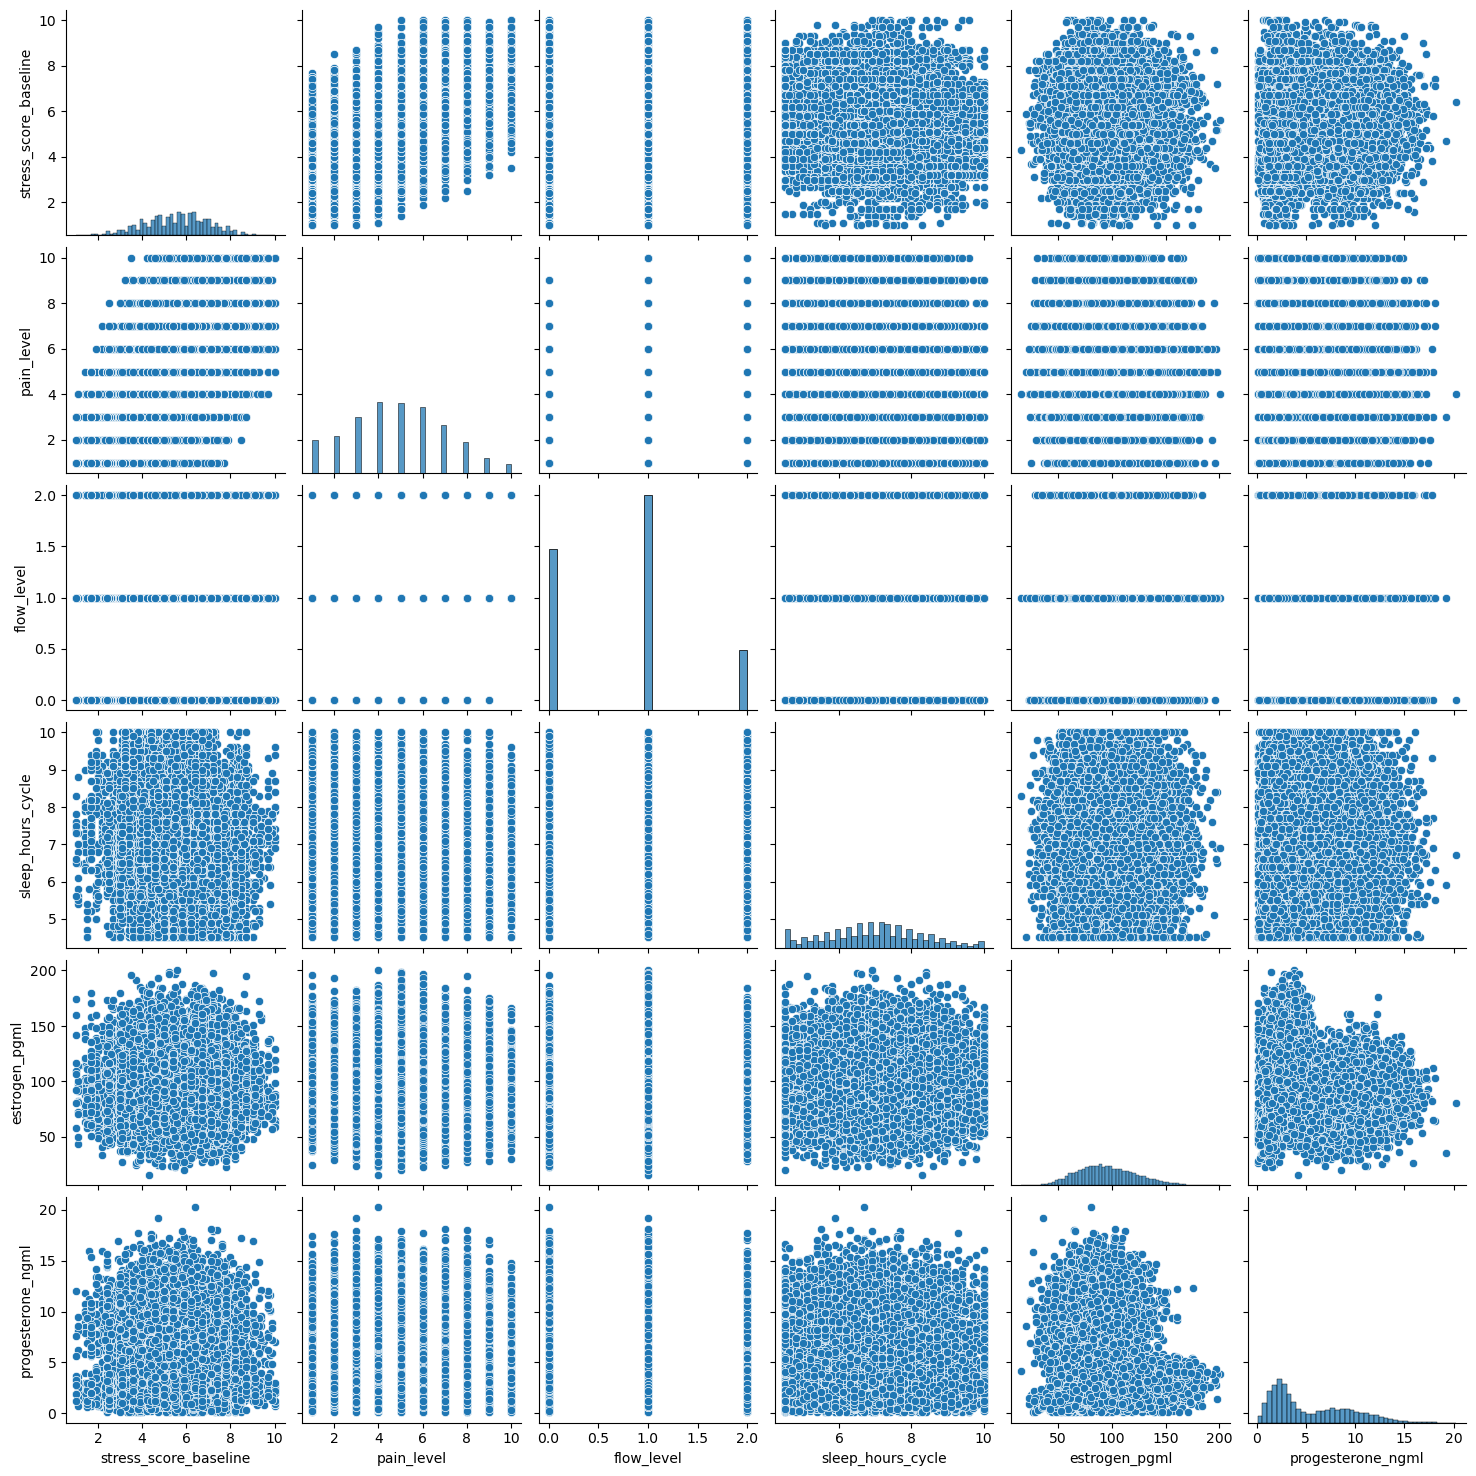

In [83]:
sns.pairplot(merged_df[['stress_score_baseline', 'pain_level', 'flow_level', 'sleep_hours_cycle', 'estrogen_pgml', 'progesterone_ngml']]);
plt.show();

#test: cycle_length_days

In [66]:
#group by user to create a dataset grouped by averages for each users
grouped_merged_df = merged_df.groupby('user_id').mean(numeric_only=True)
grouped_merged_df

cycle_number  cycle_length_days  prev_cycle_length  flow_level  \
user_id                                                                   
U00001            6.0          32.909091          32.900000    0.909091   
U00002            6.5          27.583333          27.636364    1.083333   
U00003            6.0          27.000000          27.100000    0.636364   
U00005            3.5          35.000000          35.200000    0.833333   
U00006            5.5          26.800000          26.666667    0.500000   
...               ...                ...                ...         ...   
U01995            4.0          27.285714          27.166667    0.571429   
U01997            3.5          27.500000          27.600000    0.500000   
U01998            5.5          29.300000          29.111111    0.600000   
U01999            5.5          28.200000          28.666667    0.800000   
U02000            5.5          26.900000          26.888889    0.700000   

         pain_level  pms_symptoms  mood_score  stress_score_cycle  \
user_id                                                             
U00001     5.272727      0.090909    7.090909            4.518182   
U00002     4.833333      0.083333    7.333333            5.641667   
U00003     3.181818      0.000000    8.545455            3.781818   
U00005     3.666667      0.000000    7.500000            2.683333   
U00006     3.900000      0.100000    7.200000            5.460000   
...             ...           ...         ...                 ...   
U01995     4.428571      0.285714    7.000000            6.700000   
U01997     2.000000      0.000000    8.500000            1.983333   
U01998     4.700000      0.400000    7.400000            6.080000   
U01999     4.700000      0.300000    7.600000            6.030000   
U02000     5.700000      0.400000    6.300000            7.080000   

         sleep_hours_cycle  energy_level  ...   bmi  sleep_hours  \
user_id                                   ...                      
U00001            5.463636      7.181818  ...  26.0          5.4   
U00002            5.475000      7.166667  ...  26.6          5.5   
U00003            6.981818      8.181818  ...  16.0          6.7   
U00005            7.500000      9.000000  ...  29.2          7.1   
U00006            7.640000      7.400000  ...  21.4          7.6   
...                    ...           ...  ...   ...          ...   
U01995            4.942857      6.571429  ...  18.4          4.6   
U01997            7.216667      9.166667  ...  32.8          6.9   
U01998            9.070000      6.800000  ...  26.1          9.2   
U01999            4.990000      6.800000  ...  26.5          4.9   
U02000            4.830000      6.300000  ...  20.1          4.9   

         caffeine_intake  water_intake_liters  birth_control_use  \
user_id                                                            
U00001               1.5                  2.0                1.0   
U00002               2.9                  2.3                0.0   
U00003               0.5                  2.1                1.0   
U00005               2.2                  2.2                0.0   
U00006               1.5                  1.9                1.0   
...                  ...                  ...                ...   
U01995               1.4                  1.9                1.0   
U01997               1.5                  1.3                0.0   
U01998               2.1                  2.8                1.0   
U01999               0.0                  2.8                0.0   
U02000               2.3                  2.3                1.0   

         pcos_diagnosed  stress_score_baseline  diet_quality_encoded  \
user_id                                                                
U00001              1.0                    4.1                   2.0   
U00002              0.0                    5.7                   2.0   
U00003              0.0                    3.1                   0.0   
U0000

In [89]:
grouped_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, U00001 to U02000
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cycle_number                  1615 non-null   float64
 1   cycle_length_days             1615 non-null   float64
 2   prev_cycle_length             1615 non-null   float64
 3   flow_level                    1615 non-null   float64
 4   pain_level                    1615 non-null   float64
 5   pms_symptoms                  1615 non-null   float64
 6   mood_score                    1615 non-null   float64
 7   stress_score_cycle            1615 non-null   float64
 8   sleep_hours_cycle             1615 non-null   float64
 9   energy_level                  1615 non-null   float64
 10  concentration_score           1615 non-null   float64
 11  work_hours_lost               1615 non-null   float64
 12  estrogen_pgml                 1615 non-null   float64
 13  p

In [85]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       1615 non-null   object 
 1   age                           1615 non-null   int64  
 2   bmi                           1615 non-null   float64
 3   sleep_hours                   1615 non-null   float64
 4   caffeine_intake               1615 non-null   float64
 5   water_intake_liters           1615 non-null   float64
 6   birth_control_use             1615 non-null   int64  
 7   pcos_diagnosed                1615 non-null   int64  
 8   stress_score_baseline         1615 non-null   float64
 9   diet_quality_encoded          1615 non-null   int64  
 10  exercise_frequency_encoded    1615 non-null   int64  
 11  alcohol_consumption_endcoded  1615 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 164.0+ KB


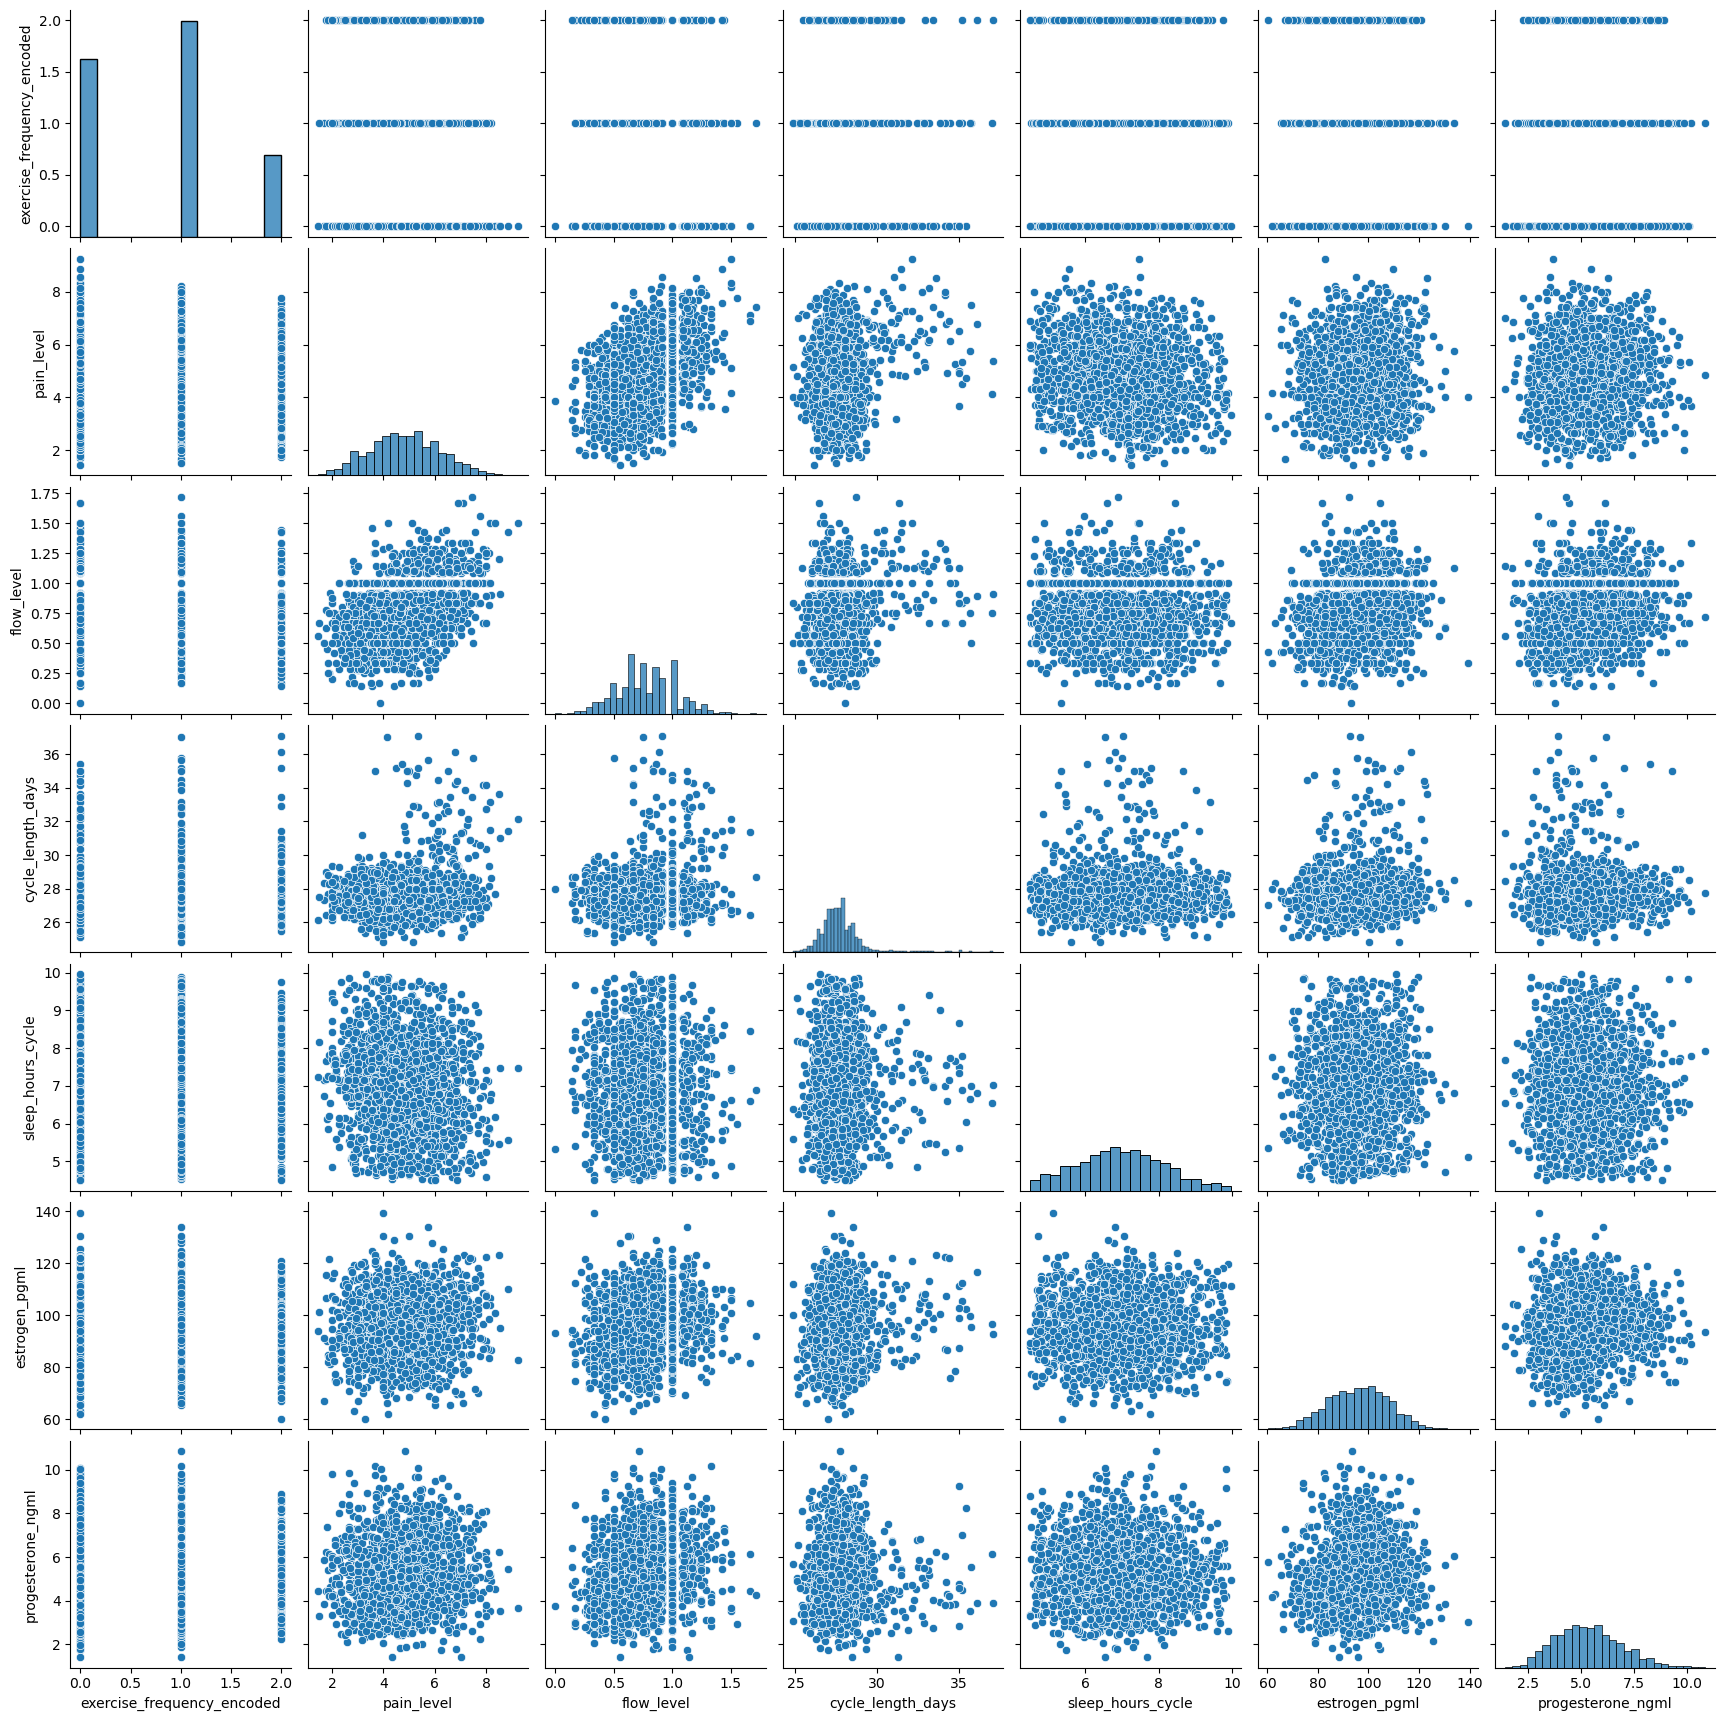

In [99]:
sns.pairplot(grouped_merged_df[['exercise_frequency_encoded', 'pain_level', 'flow_level', 'cycle_length_days', 'sleep_hours_cycle', 'estrogen_pgml', 'progesterone_ngml']]);
plt.show();

#potentials: stress_score_baseline & pain_level
#stress_score_cycle & pain_level
#pain_level & flow_level
#pain_level & overall_health_score
#age & flow_level
#sleep hours and sleep hours cycle

#no correlation seen: age
#age

## Another section

In [67]:
grouped_merged_df.head()

cycle_number  cycle_length_days  prev_cycle_length  flow_level  \
user_id                                                                   
U00001            6.0          32.909091          32.900000    0.909091   
U00002            6.5          27.583333          27.636364    1.083333   
U00003            6.0          27.000000          27.100000    0.636364   
U00005            3.5          35.000000          35.200000    0.833333   
U00006            5.5          26.800000          26.666667    0.500000   

         pain_level  pms_symptoms  mood_score  stress_score_cycle  \
user_id                                                             
U00001     5.272727      0.090909    7.090909            4.518182   
U00002     4.833333      0.083333    7.333333            5.641667   
U00003     3.181818      0.000000    8.545455            3.781818   
U00005     3.666667      0.000000    7.500000            2.683333   
U00006     3.900000      0.100000    7.200000            5.460000   

         sleep_hours_cycle  energy_level  ...   bmi  sleep_hours  \
user_id                                   ...                      
U00001            5.463636      7.181818  ...  26.0          5.4   
U00002            5.475000      7.166667  ...  26.6          5.5   
U00003            6.981818      8.181818  ...  16.0          6.7   
U00005            7.500000      9.000000  ...  29.2          7.1   
U00006            7.640000      7.400000  ...  21.4          7.6   

         caffeine_intake  water_intake_liters  birth_control_use  \
user_id                                                            
U00001               1.5                  2.0                1.0   
U00002               2.9                  2.3                0.0   
U00003               0.5                  2.1                1.0   
U00005               2.2                  2.2                0.0   
U00006               1.5                  1.9                1.0   

         pcos_diagnosed  stress_score_baseline  diet_quality_encoded  \
user_id                                                                
U00001              1.0                    4.1                   2.0   
U00002              0.0                    5.7                   2.0   
U00003              0.0                    3.1                   0.0   
U00005              1.0                    3.1                   2.0   
U00006              0.0                    4.8                   1.0   

         exercise_frequency_encoded  alcohol_consumption_endcoded  
user_id                                                            
U00001                          2.0                           1.0  
U00002                          2.0                           2.0  
U00003                          0.0                           0.0  
U00005                          0.0                           1.0  
U00006                          1.0                           1.0  

[5 rows x 32 columns]

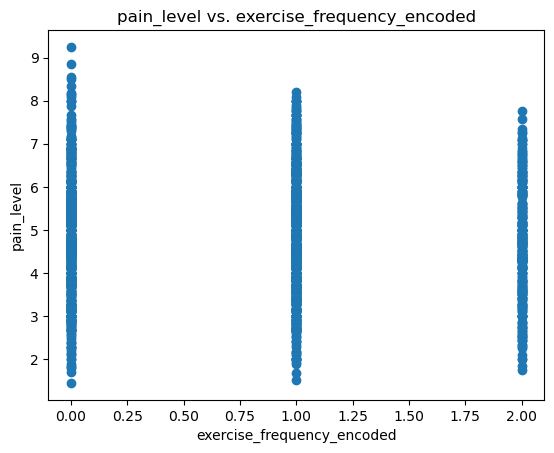

In [72]:
plt.scatter(grouped_merged_df['exercise_frequency_encoded'], grouped_merged_df['pain_level']);
plt.xlabel('exercise_frequency_encoded');
plt.ylabel('pain_level');
plt.title('pain_level vs. exercise_frequency_encoded');
plt.show()

In [46]:


#sns.pairplot(grouped_merged_df, kind='reg')